In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

screenViewer=pd.read_csv('..\\..\\dataPreprocessing\\k_movie.csv')

In [4]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family']='NanumGothic'

c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\gus10\.matplotlib


No handles with labels found to put in legend.


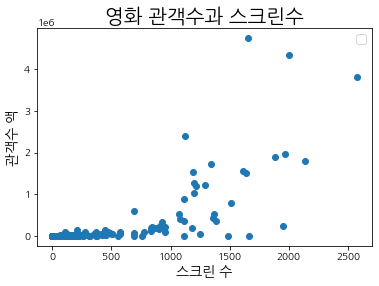

In [5]:
#스크린 수에 따른 관객수 변화 plot으로 나타내기
import matplotlib.pyplot as plt
screenViewer=screenViewer.dropna(subset=['VIEWNG_NMPR_CO', 'TOT_SCRN_CO'])
fig, ax = plt.subplots()
ax.plot(screenViewer['TOT_SCRN_CO'],
        screenViewer['VIEWNG_NMPR_CO'], 
        marker='o', 
        linestyle='')
ax.legend(fontsize=12, bbox_to_anchor=(1,1)) # legend position
plt.title('영화 관객수과 스크린수', fontsize=20)
plt.xlabel('스크린 수', fontsize=14)
plt.ylabel('관객수 액', fontsize=14)
plt.show()

In [6]:
from scipy.stats import shapiro, levene
#정규분포인지 확인 - 둘다 비정규
print(shapiro(screenViewer['VIEWNG_NMPR_CO']))
print(shapiro(screenViewer['TOT_SCRN_CO']))

#등분산성 - 등분산성을 따르지 않음
print(levene(screenViewer['VIEWNG_NMPR_CO'], screenViewer['TOT_SCRN_CO'], center='median'))

ShapiroResult(statistic=0.23703008890151978, pvalue=9.812195872917189e-37)
ShapiroResult(statistic=0.5465696454048157, pvalue=2.9475470065512904e-30)
LeveneResult(statistic=19.483510985521967, pvalue=1.1608084370786599e-05)


In [7]:
#선형 관계가 있는 지 확인 : 연속-연속 비정규 : spearman - 선형관계가 있음
print(stats.spearmanr(screenViewer['VIEWNG_NMPR_CO'],screenViewer['TOT_SCRN_CO']))

SpearmanrResult(correlation=0.7899563505344901, pvalue=6.016781155240745e-83)


In [8]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

fit = ols('VIEWNG_NMPR_CO ~ TOT_SCRN_CO',data=screenViewer).fit() ## 단순선형회귀모형 적합

In [9]:
fit.summary()
#R제곱과 수정 R제곱 수치가 0.530 ~ 0.529로 나타났다. : 50%정도의 자료만 설명 가능

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         VIEWNG_NMPR_CO   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     429.6
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.92e-64
Time:                        11:24:38   Log-Likelihood:                -5407.1
No. Observations:                 383   AIC:                         1.082e+04
Df Residuals:                     381   BIC:                         1.083e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.487e+04   1.87e+04     -3.463      0.001   -1.02e+05    -2.8e+04
TOT_SCRN_CO   832.6490     40.172     20.727      0.000     753.663     911.635
==============================================================================
Omnibus:                      411.883   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37539.599
Skew:                           4.440   Prob(JB):                         0.00
Kurtosis:                      50.681   Cond. No.                         521.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
## 변수의 선언
x = screenViewer['TOT_SCRN_CO']
y = screenViewer['VIEWNG_NMPR_CO']

## 모델의 선언
screenViewer_linearRegression = LinearRegression()
 
## 모델-데이터셋의 학습 진행
screenViewer_linearRegression.fit(x.values.reshape(-1,1), y)
 
 
## 예측 실행
print( '10000개의 스크린 수 관람 인원 예측 :{}'.format(screenViewer_linearRegression.predict([[10000]])[0])
    , 'X변수 계수: {}'.format(screenViewer_linearRegression.coef_[0])
    , sep = '\n')

10000개의 스크린 수 관람 인원 예측 :8261618.235287581
X변수 계수: 832.6490031250758


In [11]:
#기울기
print(screenViewer_linearRegression.coef_)

#절편
print(screenViewer_linearRegression.intercept_)

[832.64900313]
-64871.79596317664


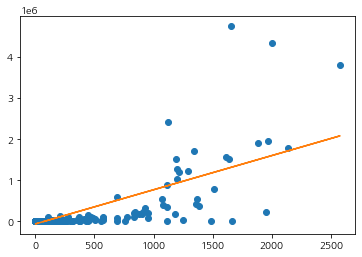

In [12]:
plt.plot(x, y, 'o')
plt.plot(x,screenViewer_linearRegression.predict(x.values.reshape(-1,1)))
plt.show()